# Results of the analysis (assets for the paper)

This notebook generates latex tables and figures used in the paper for the analysis.

## Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [23]:
google_all = pd.read_csv('./google-all-results.csv', sep=';', index_col=None)
google_all.head(3)

,rule,n,n_pos,n_neg,subset,acc,acc_std,rec,rec_std,prec,prec_std,fscore,fscore_std
0,Any,2269,1535,734,0.05,0.995064,0.000514,0.995375,0.000195,0.997324,0.000739,0.996348,0.000379
1,'package' should be separated from previous st...,2269,5,2264,0.05,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
2,'{' should be on the previous line,2269,74,2195,0.05,0.998149,0.000330,0.970270,0.005405,0.972917,0.006003,0.971585,0.005059


In [24]:
sun_all = pd.read_csv('./sun-all-results.csv', sep=';', index_col=None)
sun_all.head(3)

,rule,n,n_pos,n_neg,subset,acc,acc_std,rec,rec_std,prec,prec_std,fscore,fscore_std
0,Any,2269,539,1730,0.05,0.928559,0.001206,0.862338,0.004295,0.840971,0.002812,0.851513,0.002634
1,Line is longer than 80 characters,2270,221,2049,0.05,0.985551,0.001390,0.919005,0.014932,0.931659,0.002847,0.925226,0.007781
2,Line has trailing spaces.,2269,48,2221,0.05,0.991230,0.000460,0.793750,0.006250,0.792341,0.015247,0.792985,0.009441


Assign rule categories:

In [1]:
sun_rules_types = {'Line is longer than 80 characters' : 'Line properties', 
'Line has trailing spaces.' : 'Uni-line context',
"'{' should be on the previous line." : 'Multi-line context',
'File contains tab characters (this is the first instance).' : 'Keyword',
'Variable must be private and have accessor methods' : 'Multi-line context',
'Missing a Javadoc comment.' : 'Multi-line context', 
'Parameter should be final' : 'Uni-line context',
'Class designed for extension without Javadoc' : 'Design semantics',
"'}' should be on the same line as the next part of a multi-block statement" : 'Multi-line context',
'Hidden field' : 'Files context', 
'Symbol is not followed by whitespace.' : 'Uni-line context',
"Name must match pattern '^[A-Z][A-Z0-9]*(_[A-Z0-9]+)*$'" : 'Uni-line context',
'Expected @param tag' : 'Multi-line context', 
'Avoid inline conditionals.' : 'Uni-line context',
'Symbol is followed by whitespace.' : 'Uni-line context',
'Symbol is preceded with whitespace.' : 'Uni-line context',
'switch without "default" clause.' : 'Multi-line context',
'Symbol is not preceded with whitespace.' : 'Uni-line context', 
'Unused import' : 'Multi-line context',
'Expected an @return tag.' : 'Multi-line context', 
'Avoid nested blocks.' : 'Multi-line context', 
'Magic number' : 'Uni-line context',
'Symbol should be on a new line.' : 'Multi-line context',
'File does not end with a newline.' : 'Multi-line context',
"Redundant 'public' modifier." : 'Multi-line context', 
'Expected @throws tag' : 'Multi-line context',
"'static' modifier out of order with the JLS suggestions." : 'Uni-line context',
'First sentence should end with a period.' : 'Multi-line context',
"Redundant 'private' modifier." : 'Multi-line context', 
"'if' construct must use '{}'s." : 'Multi-line context',
'Utility classes should not have a public or default constructor.' : 'Design semantics',
'Unknown tag' : 'Uni-line context', 
'Class should be declared as final' : 'Uni-line context',
"'else' construct must use '{}'s." : 'Multi-line context',
"'for' construct must use '{}'s." : 'Multi-line context',
"'protected' modifier out of order with the JLS suggestions." : 'Uni-line context',
'Method length greater than 150' : 'Multi-line context',
'Inner assignments should be avoided.' : 'Multi-line context', 
'Unclosed HTML tag found' : 'Multi-line context',
"Comment matches to-do format 'TODO:'." : 'Multi-line context',
"Redundant 'final' modifier." : 'Multi-line context', 
'Expression can be simplified.' : 'Multi-line context',
'Extra HTML tag found' : 'Multi-line context',
"'public' modifier out of order with the JLS suggestions." : 'Uni-line context',
'Array brackets at illegal position.' : 'Uni-line context', 
'Unused @param tag' : 'Multi-line context',
'Unable to get class information for @throws tag' : 'Checkstyle error'}

In [9]:
google_rules_types = {"'package' should be separated from previous statement." : 'Uni-line context',
"'{' should be on the previous line" : 'Multi-line context',
'First sentence of Javadoc is incomplete (period is missing) or not present.' : 'Multi-line context',
'Line contains a tab character.' : 'Keyword', 
'Incorrect indentation level' : 'Multi-line context',
'<p> tag should be placed immediately before the first word, with no space after.' : 'Uni-line context',
'<p> tag should be preceded with an empty line.' : 'Multi-line context',
"'}' should be on the same line as the next part of a multi-block statement" : 'Multi-line context',
'Wrong lexicographical order for import' : 'Uni-line context',
'Line is longer than 100 characters' : 'Line properties', 
'Missing a Javadoc comment.' : 'Multi-line context',
"Abbreviation in name must contain no more than '2' consecutive capital letters" : 'Uni-line context', 
"Member name must match pattern '^[a-z][a-z0-9][a-zA-Z0-9]*$'" : 'Uni-line context', 
'At-clause should have a non-empty description.' : 'Uni-line context',
'Whitespace around a symbol is not followed by whitespace' : 'Uni-line context',
"'(' is followed by whitespace." : 'Uni-line context', 
"')' is preceded with whitespace." : 'Uni-line context', 
'switch without "default" clause.' : 'Multi-line context',
'Whitespace around a symbol is not preceded by whitespace' : 'Uni-line context',
'Symbol should be on a new line' : 'Uni-line context',
'Overload methods should not be split' : 'Multi-line context',
'Empty line should be followed by <p> tag on the next line.' : 'Multi-line context',
'Top-level class BookmarkStack has to reside in its own source file.' : 'Files context',
"'static' modifier out of order with the JLS suggestions." : 'Uni-line context',
'Empty catch block.' : 'Multi-line context', 
"'if' construct must use '{}'s." : 'Multi-line context', 
"'CTOR_DEF' should be separated from previous statement." : 'Multi-line context', 
"'else' construct must use '{}'s." : 'Multi-line context', 
"'for' construct must use '{}'s." : 'Multi-line context', 
"'protected' modifier out of order with the JLS suggestions." : 'Uni-line context', 
"Distance between variable declaration and its first usage is more than '3'" : 'Multi-line context', 
'Javadoc comment has parse error.' : 'Multi-line context',
"GenericWhitespace '>' is followed by whitespace." : 'Uni-line context', 
"Local variable name must match pattern '^[a-z]([a-z0-9][a-zA-Z0-9]*)?$'" : 'Multi-line context', 
'Each variable declaration must be in its own statement.' : 'Uni-line context',
"Catch parameter name 'eMissingResource' must match pattern '^[a-z]([a-z0-9][a-zA-Z0-9]*)?$'." : 'Uni-line context', 
"'public' modifier out of order with the JLS suggestions." : 'Uni-line context', 
'Array brackets at illegal position.' : 'Uni-line context',
"At-clauses have to appear in the order '[@param, @return, @throws, @deprecated]'." : 'Multi-line context', 
"Parameter must match pattern '^[a-z]([a-z0-9][a-zA-Z0-9]*)?$'" : 'Uni-line context', 
'Single-line Javadoc comment should be multi-line.' : 'Uni-line context',
"'METHOD_DEF' should be separated from previous statement." : 'Multi-line context', 
'Redundant <p> tag.' : 'Multi-line context'}

In [20]:
all_type_of_rules = set(google_rules_types.values()) | (set(sun_rules_types.values()))
all_type_of_rules

{'Checkstyle error',
 'Design semantics',
 'Files context',
 'Keyword',
 'Line properties',
 'Multi-line context',
 'Uni-line context'}

## Tables

In [49]:
import re

def tex_escape(text):
    """
        :param text: a plain text message
        :return: the message escaped to appear correctly in LaTeX
    """
    conv = {
        '&': r'\&',
        '%': r'\%',
        '$': r'\$',
        '#': r'\#',
        '_': r'\_',
        '{': r'\{',
        '}': r'\}',
        '~': r'\textasciitilde{}',
        '^': r'\^{}',
        '\\': r'\textbackslash{}',
        '<': r'\textless{}',
        '>': r'\textgreater{}',
        '[': r'$[$',
        ']': r'$]$',
    }
    regex = re.compile('|'.join(re.escape(key) for key in sorted(conv.keys(), key = lambda item: - len(item))))
    return regex.sub(lambda match: conv[match.group()], text)

In [198]:
def trim_rule(rule , n=100):
    return  rule[:n] + (rule[n:] and '...')

def generate_table_body(results, types):
    
    values = results[(results['subset'] == 1) & (results['n_pos'] >= 10)].sort_values(['fscore', 'n_pos'], ascending=False)

    for i in range(values.shape[0]):
        row = values.iloc[i]
        # File contains tab characters (this is the first instance). -> is marked in the first line
        if row['rule'] not in ['Any', 'File contains tab characters (this is the first instance).']:
            print(f"{tex_escape(trim_rule(row['rule']))} ({types[row['rule']].replace(' context', '')}) & "
                 f"{row['n_pos']:,} & "
                 f"{row['acc']*100:.2f} &"
                 f"{row['prec']:.3f} & "
                 f"{row['rec']:.3f} & "
                 f"{row['fscore']:.3f} \\\\") 
    

In [199]:
# Google
print('Violation of the Google Java style & N & Accuracy \%    &    Precision    &    Recall    &    F-Score \\\\ ')
print('\\hline')
generate_table_body(results = google_all, types = google_rules_types)


Violation of the Google Java style & N & Accuracy \%    &    Precision    &    Recall    &    F-Score \\ 
\hline
Line contains a tab character. (Keyword) & 30,366 & 100.00 &1.000 & 1.000 & 1.000 \\
'(' is followed by whitespace. (Uni-line) & 29 & 100.00 &1.000 & 1.000 & 1.000 \\
'\{' should be on the previous line (Multi-line) & 1,479 & 99.98 &0.997 & 0.998 & 0.997 \\
Incorrect indentation level (Multi-line) & 18,277 & 99.51 &0.993 & 0.995 & 0.994 \\
At-clause should have a non-empty description. (Uni-line) & 315 & 99.99 &0.990 & 0.995 & 0.992 \\
'package' should be separated from previous statement. (Uni-line) & 95 & 99.99 &0.979 & 0.989 & 0.984 \\
'for' construct must use '\{\}'s. (Multi-line) & 15 & 100.00 &1.000 & 0.940 & 0.969 \\
')' is preceded with whitespace. (Uni-line) & 30 & 100.00 &0.967 & 0.963 & 0.965 \\
'if' construct must use '\{\}'s. (Multi-line) & 92 & 99.98 &0.929 & 0.977 & 0.952 \\
Line is longer than 100 characters (Line properties) & 1,178 & 99.73 &0.954 & 0.940 & 

In [200]:
# Sun
print('Violation of the Sun Java style & N & Accuracy \%    &    Precision    &    Recall    &    F-Score \\\\ ')
print('\\hline')
generate_table_body(results = sun_all, types = sun_rules_types)


Violation of the Sun Java style & N & Accuracy \%    &    Precision    &    Recall    &    F-Score \\ 
\hline
'\{' should be on the previous line. (Multi-line) & 1,479 & 99.98 &0.998 & 0.997 & 0.997 \\
Line is longer than 80 characters (Line properties) & 4,404 & 99.93 &0.997 & 0.996 & 0.996 \\
Avoid inline conditionals. (Uni-line) & 153 & 100.00 &0.997 & 0.991 & 0.994 \\
'for' construct must use '\{\}'s. (Multi-line) & 15 & 100.00 &1.000 & 0.987 & 0.993 \\
Parameter should be final (Uni-line) & 1,597 & 99.90 &0.983 & 0.990 & 0.987 \\
Missing a Javadoc comment. (Multi-line) & 1,153 & 99.88 &0.979 & 0.975 & 0.977 \\
Variable must be private and have accessor methods (Multi-line) & 295 & 99.95 &0.971 & 0.949 & 0.960 \\
Line has trailing spaces. (Uni-line) & 950 & 99.82 &0.958 & 0.954 & 0.956 \\
'static' modifier out of order with the JLS suggestions. (Uni-line) & 11 & 100.00 &1.000 & 0.909 & 0.952 \\
Class designed for extension without Javadoc (Design semantics) & 977 & 99.79 &0.938 & 0

Some aggregated values:

In [214]:
results = google_all
values = results[(results['subset'] == 1) & (results['n_pos'] >= 10) & (~results['rule'].isin(['Any', 'File contains tab characters (this is the first instance).']))]

values['fscore'].mean()


0.8065612330541209

In [215]:
results = sun_all
values = results[(results['subset'] == 1) & (results['n_pos'] >= 10) & (~results['rule'].isin(['Any', 'File contains tab characters (this is the first instance).']))]

values['fscore'].mean()


0.8208332796665174

In [218]:
results = google_all
values = results[(results['subset'] == 1) & (results['n_pos'] >= 10) & (~results['rule'].isin(['Any', 'File contains tab characters (this is the first instance).']))]

values['acc'].mean()


0.9992607186156728

In [219]:
results = sun_all
values = results[(results['subset'] == 1) & (results['n_pos'] >= 10) & (~results['rule'].isin(['Any', 'File contains tab characters (this is the first instance).']))]

values['acc'].mean()


0.9989686942536056

## Plots

In [189]:
# merge results for Google and Sun
google_sun_all = pd.concat([google_all, sun_all], axis=0)
google_sun_all = google_sun_all[google_sun_all['rule'] != 'Any']
google_sun_all = google_sun_all[google_sun_all['rule'] != 'File contains tab characters (this is the first instance).']
google_sun_all.head(1)

,rule,n,n_pos,n_neg,subset,acc,acc_std,rec,rec_std,prec,prec_std,fscore,fscore_std
1,'package' should be separated from previous st...,2269,5,2264,0.05,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [190]:
# add type of line
google_sun_all['type'] = google_sun_all.apply(lambda x: google_rules_types[x['rule']] if x['rule'] in google_rules_types.keys() else sun_rules_types[x['rule']],
                     axis=1)

google_sun_all = google_sun_all[google_sun_all['type'] != 'Checkstyle error']

In [122]:
google_sun_all.head(1)

,rule,n,n_pos,n_neg,subset,acc,acc_std,rec,rec_std,prec,prec_std,fscore,fscore_std,type
1,'package' should be separated from previous st...,2269,5,2264,0.05,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Uni-line context


In [191]:
# we filter rulest that have at least 40 violations to have at least 2 observations when underspamling to 0.05 
google_sun_all = google_sun_all[google_sun_all['n_pos'] >= 40]

google_sun_all['subset_perc'] = google_sun_all['subset']*100
google_sun_all['acc_perc'] = google_sun_all['acc']*100

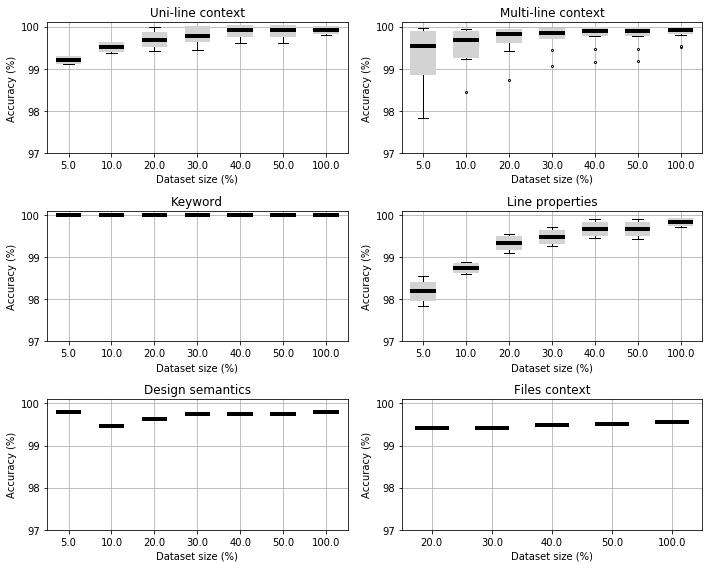

In [204]:
boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='black')
flierprops = dict(marker='o', markerfacecolor='white', markersize=2,
                  linestyle='none')
ymin=97
ymax=100.1

fig = plt.figure(figsize=(10,8))

rule_type = 'Uni-line context'

ax = plt.subplot(321)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['acc_perc'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Multi-line context'

ax = plt.subplot(322)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['acc_perc'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Keyword'

ax = plt.subplot(323)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['acc_perc'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Line properties'

ax = plt.subplot(324)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['acc_perc'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Design semantics'

ax = plt.subplot(325)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['acc_perc'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Files context'

ax = plt.subplot(326)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['acc_perc'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(ymin,ymax)
ax.grid(True)

plt.tight_layout()
plt.savefig('learning-per-rule.pdf')
plt.show()


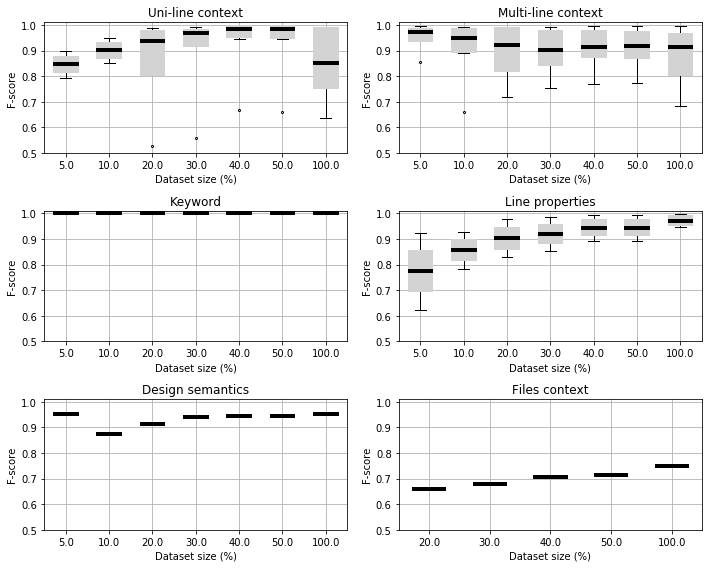

In [217]:
boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='black')
flierprops = dict(marker='o', markerfacecolor='white', markersize=2,
                  linestyle='none')
ymin=0.5
ymax=1.01

fig = plt.figure(figsize=(10,8))

rule_type = 'Uni-line context'

ax = plt.subplot(321)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['fscore'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('F-score')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Multi-line context'

ax = plt.subplot(322)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['fscore'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('F-score')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Keyword'

ax = plt.subplot(323)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['fscore'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('F-score')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Line properties'

ax = plt.subplot(324)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['fscore'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('F-score')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Design semantics'

ax = plt.subplot(325)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['fscore'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('F-score')
ax.set_ylim(ymin,ymax)
ax.grid(True)

rule_type = 'Files context'

ax = plt.subplot(326)
bp = google_sun_all[google_sun_all['type'] == rule_type].boxplot(ax=ax, column=['fscore'], by=['subset_perc'], 
                            showfliers=True, return_type='dict',
                            boxprops=boxprops,
                            medianprops=medianprops, flierprops=flierprops, patch_artist=True)
[[item.set_color('lightgray') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('black') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('black') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['means']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
#[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

plt.suptitle("")
ax.set_title(f'{rule_type}')
ax.set_xlabel('Dataset size (%)')
ax.set_ylabel('F-score')
ax.set_ylim(ymin,ymax)
ax.grid(True)

plt.tight_layout()
plt.savefig('learning-per-rule-fscore.pdf')
plt.show()
